# Probability In Python

In [ ]:
# While the Belize dataset is not normally distributed, act as if it is for the purposes of the homework. 


#3.Create a box and whisker plot for availability_365. What does this show you?
#4.What is the probability that the price for an Airbnb is under $50?
What do you notice about these records? Hint: look at the other columns.
What distribution does this data most closely fit?
#5.Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
Why sample variance and not population variance?
What is your takeaway for each metric?
What are the scales of measurement for each of these values? 
#6.What percent of Airbnb listings in Belize are available 360 days a year or more?
360 days or less?
What distribution does this data most closely fit?
#7.What minimum night count are 75% of Airnbnb listing in Belize greater than?


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import stats
#belize listings csv file into dataframe
belize_df=pd.read_csv('belize_airbnb_listings.csv')

In [189]:
belize_df.head(25)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203
5,120116,Valarosa,604999,Bobbi,Belize,Belize Islands,17.73644,-88.02858,Entire home/apt,171,2,49,3/23/2020,0.80,22,0
6,124794,Sabal Beach - secluded eco-retreat,562206,David & Wayne,Toledo,Toledo Mainland,16.28752,-88.54550,Entire home/apt,232,3,18,1/12/2020,0.16,2,338
7,152512,"Stunning one br apt-kitchen, air con, bikes & ...",733857,Jacki,Stann Creek,Stann Creek Mainland,16.52644,-88.37000,Entire home/apt,165,7,64,2/10/2021,0.57,5,298
8,152922,rent a private room in a house,735525,Jennifer,Cayo,Cayo,17.25395,-88.76870,Private room,52,1,11,12/14/2019,0.18,1,364
9,171294,King Deluxe,817242,Michael,Cayo,Cayo,17.16261,-89.06995,Private room,286,1,40,2/3/2020,0.47,8,362


In [6]:
#4.What is the probability that the price for an Airbnb is under $50?
belize_df['price'].value_counts()/belize_df['price'].count()

252     0.023963
151     0.023963
161     0.022175
171     0.021459
121     0.021102
          ...   
67      0.000358
2736    0.000358
231     0.000358
439     0.000358
118     0.000358
Name: price, Length: 541, dtype: float64

In [6]:
from scipy.stats import norm
price_less_50 = norm.cdf(50,357,563)
price_less_50


0.2927759838151833

In [22]:
belize_df[belize_df['price']<50].count()

id                                49
name                              49
host_id                           49
host_name                         49
neighbourhood_group               49
neighbourhood                     49
latitude                          49
longitude                         49
room_type                         49
price                             49
minimum_nights                    49
number_of_reviews                 49
last_review                       41
reviews_per_month                 41
calculated_host_listings_count    49
availability_365                  49
dtype: int64

In [26]:
belize_df['price'].agg(['mean','median','std'])

mean      357.102289
median    220.000000
std       563.124825
Name: price, dtype: float64

**1.Why is assuming normal data an important consideration when answering questions about probability?**

    The Normal Distribution shows up widely in statistics as a result of the Central Limit Theorem. The outcomes of many events in nature closely resemble this distribution, hence the name **normal**. In a normal distribution the mean is zero and the standard deviation is 1. It has zero skew. Normal distributions are symmetrical.

**2.Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month 
and number_of_reviews in Belize Airbnb data. How do you choose your bin size?**

There are total 1810 reviews per month in the belize data. The distribution of reviews per month is
   
   from 0 to <=1 --> 1521
  
   from >1 to 2  -->  206
   
   from >2 to 3  -->   65
   
   from >3 to 6  -->   18
   
   after >6      -->    0
   
So I have chosen my bins **(0,0.5,1,1.5,2,3,6)** to show how many are fallen under the respective bins.


There are total 2796 number of reviews in the belize data. The distribution of reviews per month is
   
   from 0 to 15 --> 2147
  
   from 16 to 50 -->  426
   
   from 51 to 100  -->  132
   
   from 101 to 300  -->   90
   
   after 300    -->    1
   
So I have chosen my bins **(0,15,50,100,300)** to show how many are fallen under the respective bins. 

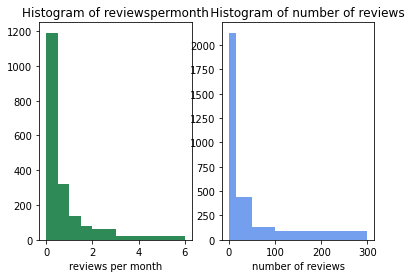

In [172]:
#2.Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month 
# and number_of_reviews in Belize Airbnb data. How do you choose your bin size?
fig,ax = plt.subplots(1,2)

ax[0].hist(belize_df['reviews_per_month'], bins =[0,0.5,1,1.5,2,3,6], color = 'seagreen')
ax[0].set_xlabel('reviews per month')
ax[0].set_title("Histogram of reviewspermonth")

ax[1].hist(belize_df['number_of_reviews'], bins =[0,15,50,100,300] ,color='cornflowerblue', alpha=0.9)
ax[1].set_xlabel('number of reviews')
ax[1].set_title("     Histogram of number of reviews")

plt.show()

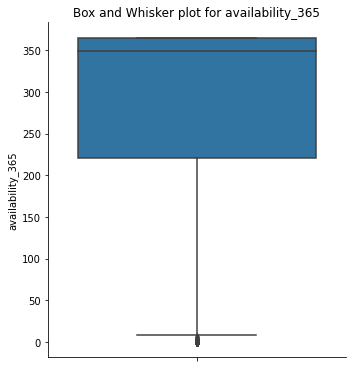

In [184]:
#3.Create a box and whisker plot for availability_365. What does this show you?

g = sns.catplot(y='availability_365', data=belize_df, kind='box')
g.ax.set_title("Box and Whisker plot for availability_365") 
plt.show()

### Observation from Box Plot
The colored box represents the lower and upper quartile, and the line in the middle of the box represents the median value(Here median is 349). Whisker to the left of the lower quartile representing the data points that are less than the lower quartile. And the floating points are outliers. 

**Whisker to the right of the upper quartile representing the data points that are greater than the upper quartile.Since there is no values greater than Q3(maximum is 365) so we don't have that whisker here.** 

In [ ]:
# 4.What is the probability that the price for an Airbnb is under $50?
# What do you notice about these records? Hint: look at the other columns.
# What distribution does this data most closely fit?

In [192]:
belize_df[(belize_df['price']<50)&(belize_df['neighbourhood']=='Belize Islands')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
590,16756245,Beach front Room # 1,111045216,Mario,Belize,Belize Islands,17.76116,-88.02775,Private room,46,1,126,3/11/2020,2.56,16,179
1267,26627857,Vista del Mar Guest House Room # 6,111045216,Mario,Belize,Belize Islands,17.74490,-88.02374,Private room,44,1,89,3/12/2020,2.79,16,358
1325,27875387,Vista del Mar Guest House Room # 4,111045216,Mario,Belize,Belize Islands,17.74154,-88.02421,Private room,36,1,87,2/16/2021,2.94,16,211
1772,34082895,Vista Del Mar Guest House ROOM # 3,111045216,Mario,Belize,Belize Islands,17.74637,-88.02284,Private room,30,1,51,8/2/2020,2.28,16,181


In [194]:
belize_df[belize_df['price']<50]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
134,4005831,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51482,-88.22233,Private room,20,1,2,3/1/2020,0.03,10,365
148,4304743,"DORMITORY Bed #1 of 6, on Maya Ruin",2084006,Lower Dover,Cayo,Cayo,17.21379,-88.94974,Shared room,36,1,1,2/10/2020,0.08,4,365
172,4936432,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51426,-88.22121,Shared room,20,1,16,2/4/2020,0.24,10,365
189,5509363,"Yaxche Jungle Camp, Dormitory",6960726,Yaxche Jungle Camp,Cayo,Cayo,17.15125,-88.66244,Shared room,24,1,30,2/25/2020,0.42,2,365
196,5717367,Comfortable and Ecological Camping,29641332,Minerva,Cayo,Cayo,17.05410,-89.11378,Entire home/apt,30,1,6,10/16/2017,0.09,1,365
315,10004488,Long Term Stay in the country,48785884,Barbara And Bart,Orange Walk,Orange Walk,18.08422,-88.54060,Entire home/apt,22,28,0,NaN,NaN,2,115
341,10857678,Gecko Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03210,-88.51931,Private room,28,7,1,3/5/2020,0.08,9,218
343,11010397,Tree Frog Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03278,-88.51718,Private room,28,7,2,4/23/2019,0.08,9,218
344,11015225,Fern Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03380,-88.51922,Private room,28,7,7,2/15/2020,0.19,9,218
346,11057764,Jacamar Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03246,-88.51903,Private room,28,7,3,12/24/2019,0.08,9,218


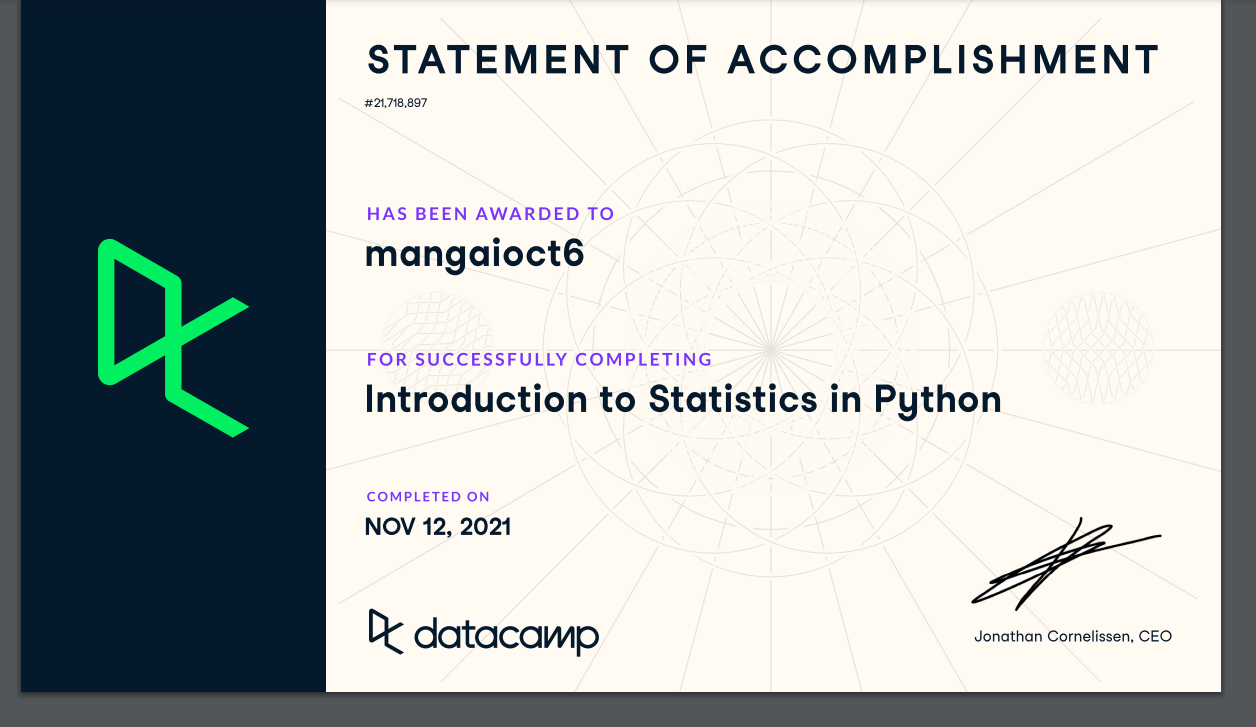